## Diabetes Data linear regression Implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/pima-indians-diabetes.csv')
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
data.tail()

,6,148,72,35,0,33.6,0.627,50,1
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1
766,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction'

, 'Age', 'Class']
df = pd.read_csv('/pima-indians-diabetes.csv', names=cols)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Exploratory data analysis

In [ ]:
def plot_scatter(df, cols):
    plt.figure(figsize=(20, 20))
    plt.suptitle('Independent vs Dependent Features')
    for loc, col in enumerate(cols):
        plt.subplot(4, 4, loc+1)
        plt.scatter(df[col], df['1'])
        plt.xlabel(f'{col}')
        plt.ylabel('1')
    return None

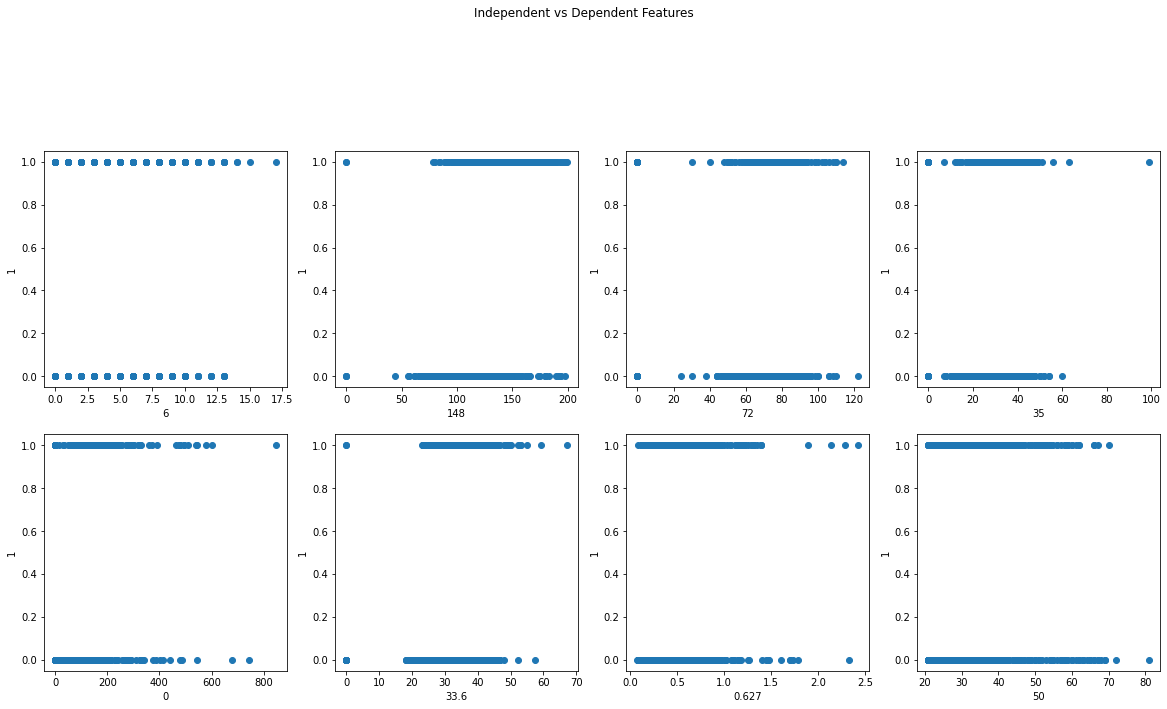

In [ ]:
plot_scatter(data, data.columns[:-1])
plt.show()
plt.close()

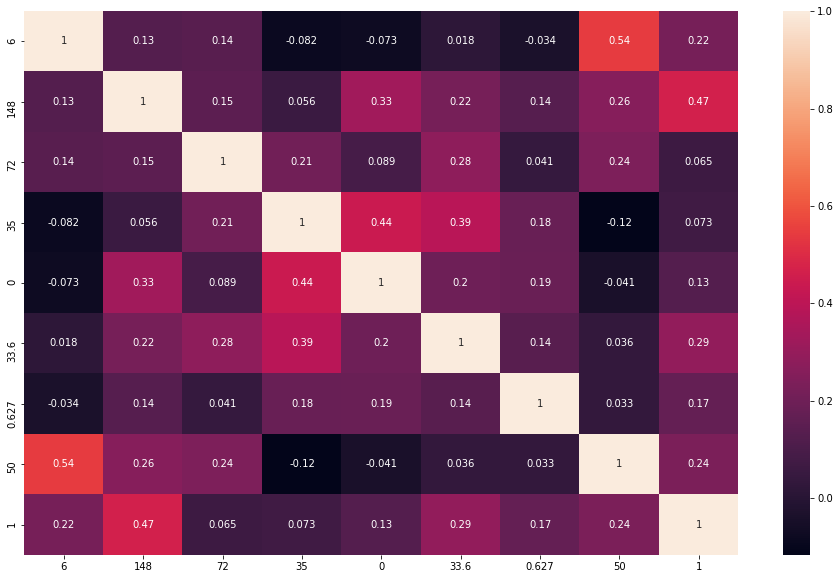

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

Splitting dataset

In [ ]:
features = data.drop(['1'], axis=1)
target = data['1']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
print(X_train.shape)

(536, 8)


Model Training

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(lr_model.intercept_, lr_model.coef_)

-0.862481182281654 [ 2.16590524e-02  5.79533160e-03 -9.17115082e-04  9.43836573e-04
 -4.38065753e-05  1.03858914e-02  1.59384954e-01  2.08449501e-03]


In [ ]:
train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)

print(f"Training error: {sqrt(mean_squared_error(y_train, train_pred)):.3f}")
print(f"Testing error: {sqrt(mean_squared_error(y_test, test_pred)):.3f}")

Training error: 0.402
Testing error: 0.394


In [ ]:
y_test

667    0
324    0
623    0
689    0
521    0
      ..
618    1
198    1
537    0
329    0
302    1
Name: 1, Length: 231, dtype: int64

In [ ]:
test_pred

array([ 3.16335436e-01,  3.50984759e-01,  1.36880044e-01,  3.20321792e-01,
        1.24615610e-02,  2.18864872e-01,  1.88854206e-01,  3.13003100e-01,
        5.28532272e-01, -2.79462011e-03,  7.81131292e-01,  4.69259428e-01,
        2.39162947e-01,  5.15100975e-01,  6.93822093e-01,  7.91804260e-01,
        1.40751118e-01,  1.26863854e-01,  3.10987415e-01,  4.00540007e-01,
        2.80067039e-01,  7.26484247e-02,  2.24186320e-01,  8.20327239e-01,
        4.41960745e-01,  2.01948635e-03,  1.76943231e-01, -3.52054482e-02,
        2.55465553e-01,  4.67021278e-01,  3.35534656e-01,  5.05328513e-01,
        7.34611226e-01,  4.34971713e-01, -3.12795758e-02,  7.96281326e-01,
        9.33034485e-01,  4.18874060e-01,  4.88918332e-01,  1.48755218e-01,
        1.50768668e-01,  6.88491457e-01,  5.93899753e-01,  4.33133326e-01,
        4.80921730e-01,  1.32939086e-02,  6.58000253e-01,  4.42608575e-01,
        6.37062315e-01,  8.75742060e-01,  5.39630087e-02,  3.07265542e-01,
       -1.49806471e-01,  

In [ ]:
lr_model.score(X_test, y_test)

0.3139947323032979

In [ ]:
lr_model.score(X_train, y_train)

0.288670435243628

# Diabetics dataset using logistic regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
data = pd.read_csv('/content/pima-indians-diabetes.csv')
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data['1'].unique()


array([0, 1])

<Figure size 1440x1440 with 0 Axes>

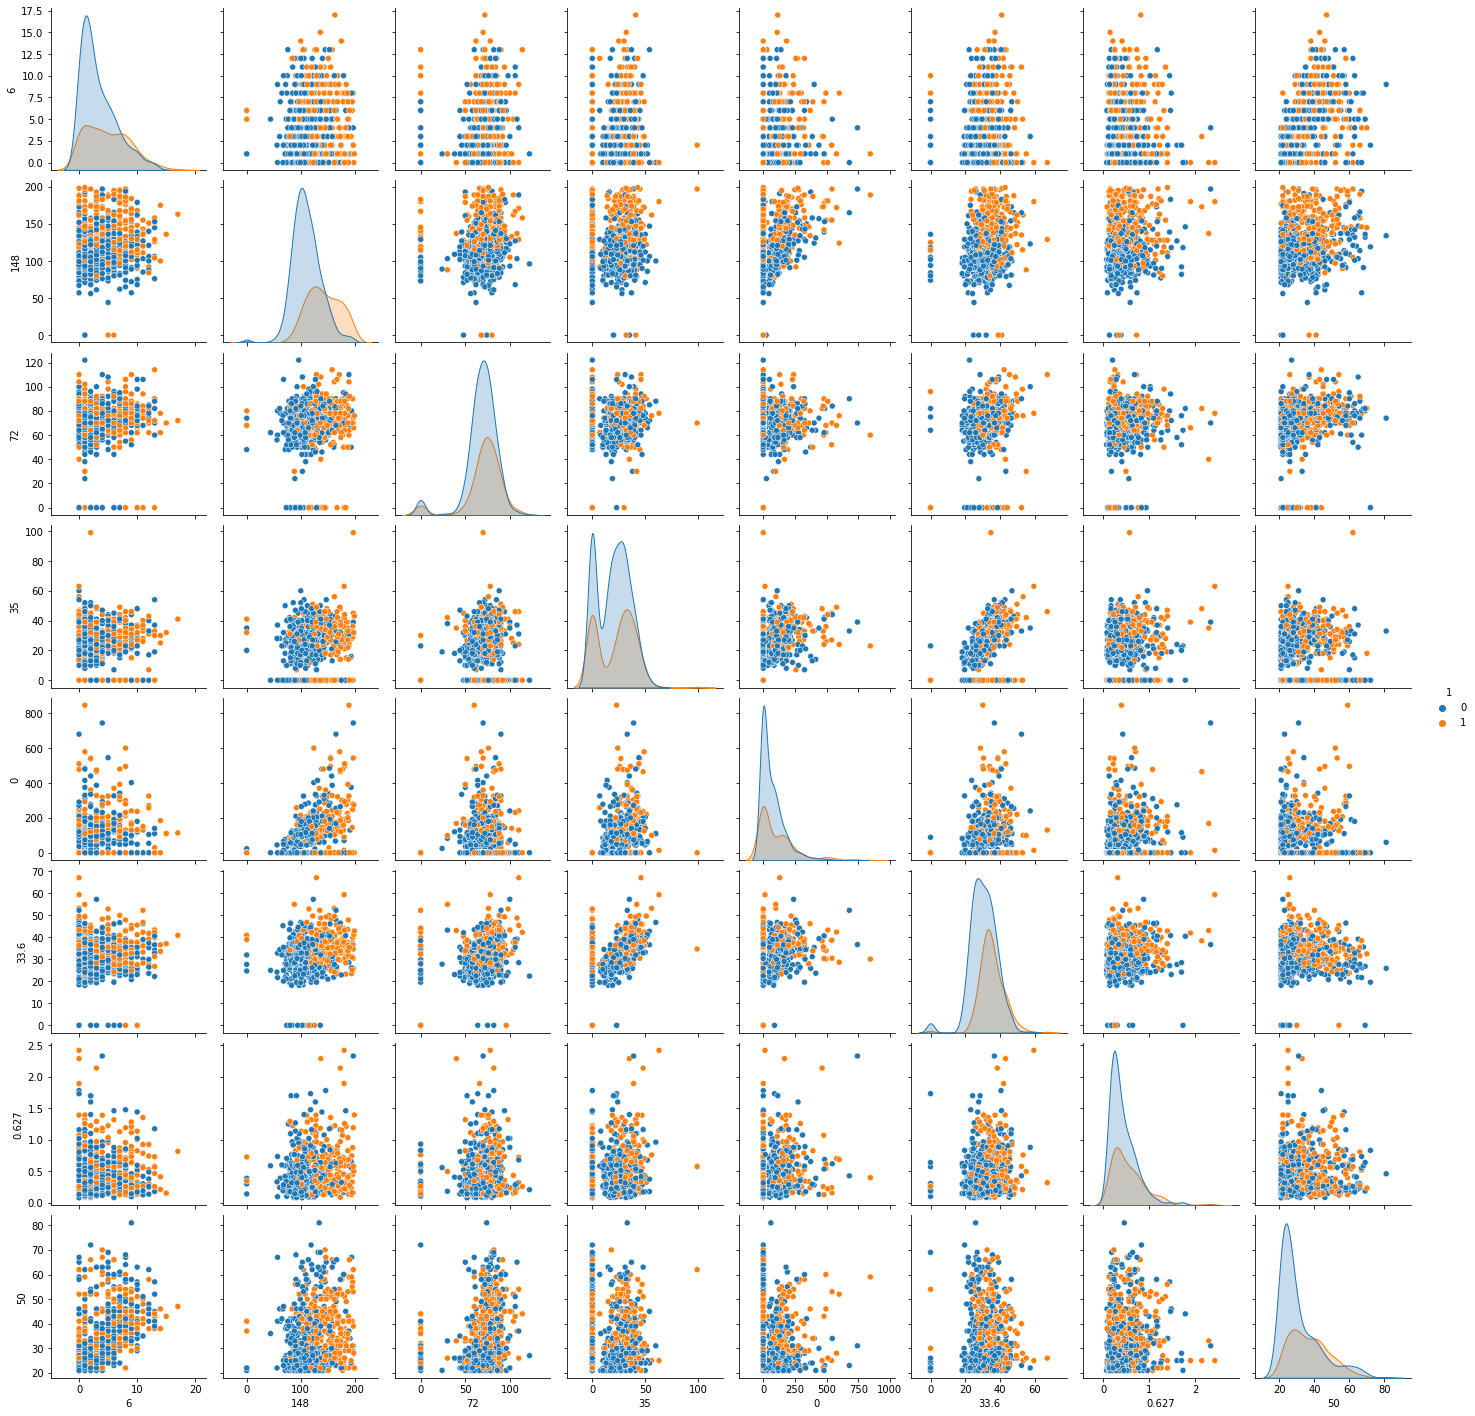

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(data, hue='1')
plt.show()
plt.close()

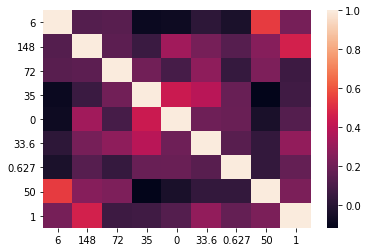

In [ ]:
sns.heatmap(data.corr())

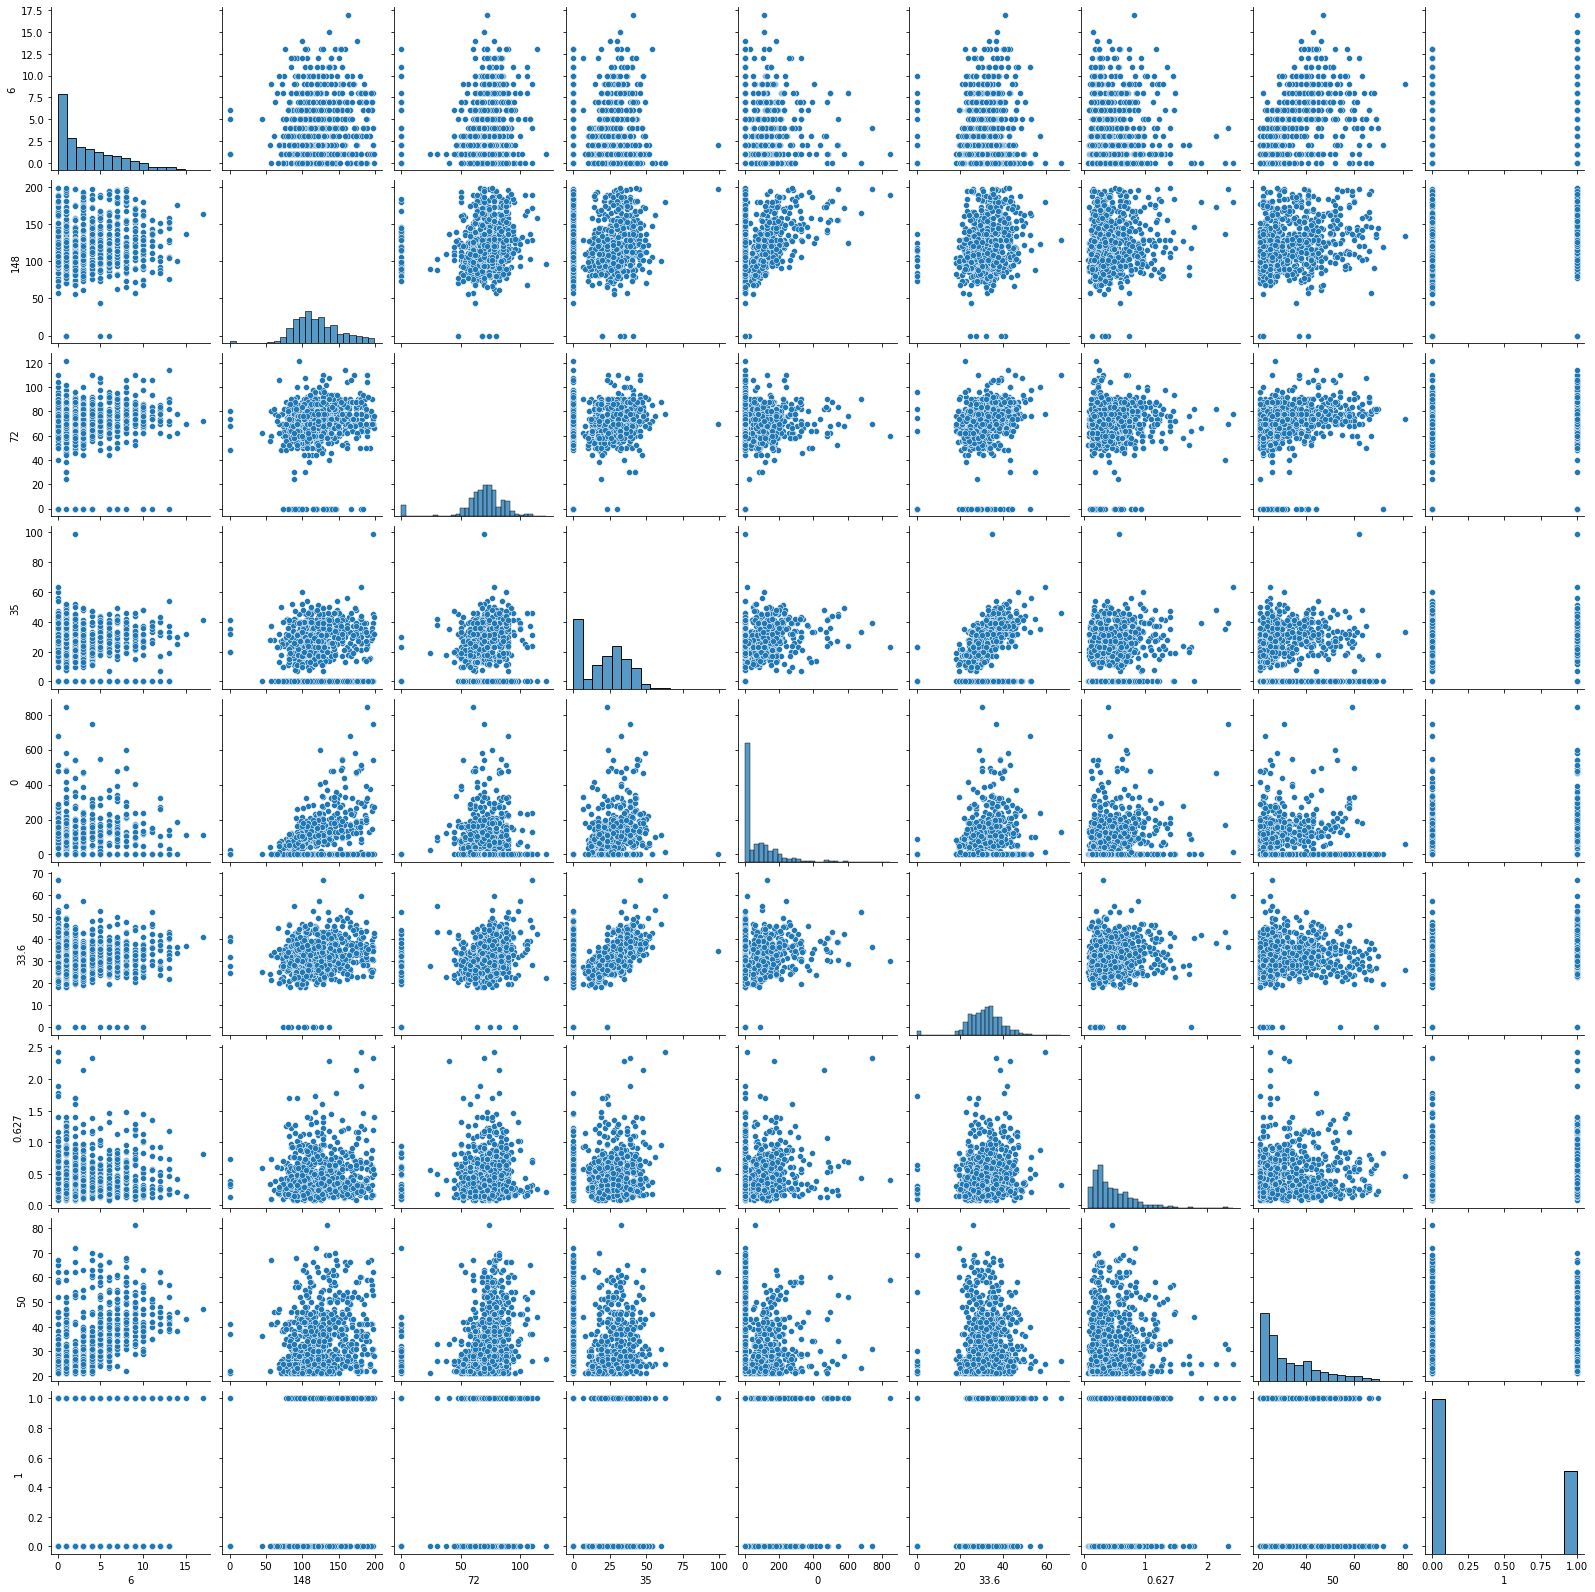

In [ ]:
sns.pairplot(data)

In [ ]:
features = data.drop(['1'], axis=1)
target = data['1']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=42)

Logistic Regressiom

In [ ]:
logreg_model = LogisticRegression(max_iter=200, solver='lbfgs')
logreg_model.fit(X_train, y_train)

train_pred = logreg_model.predict(X_train)
test_pred =  logreg_model.predict(X_test)

In [ ]:
print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 76.707%
Testing Accuracy: 79.182%


## KNN

In [ ]:
k_range = range(1, 21)
train_acc = []
test_acc = []

for k in k_range:    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    train_pred = knn_model.predict(X_train)
    test_pred =  knn_model.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

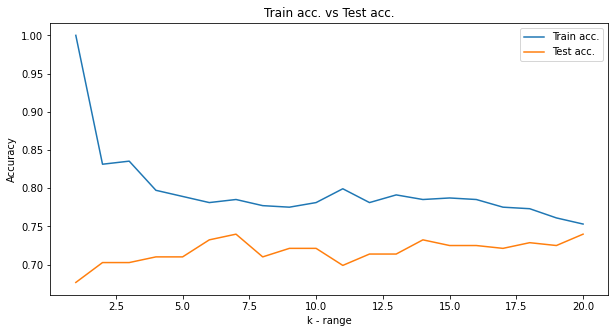

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, label='Train acc.')
plt.plot(k_range, test_acc, label='Test acc.')
plt.legend()
plt.xlabel('k - range')
plt.ylabel('Accuracy')
plt.title('Train acc. vs Test acc.')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)

train_pred = knn_model.predict(X_train)
test_pred =  knn_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 78.112%
Testing Accuracy: 73.234%


## CART DT

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 99.398%
Testing Accuracy: 74.721%


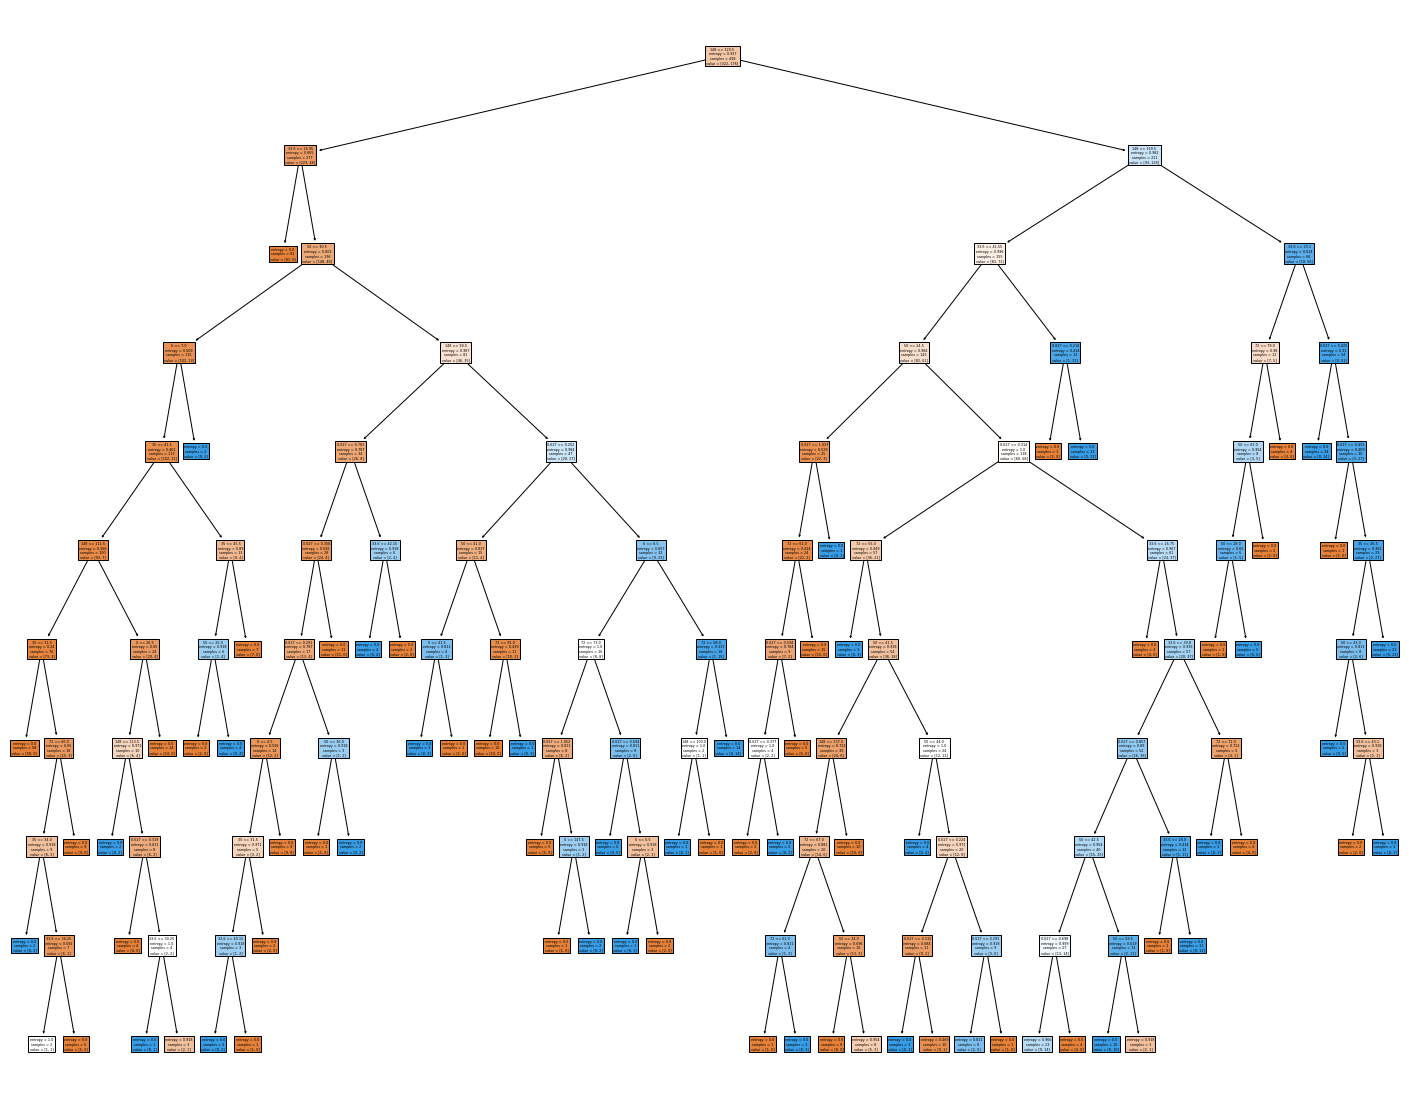

In [ ]:
fig = plt.figure(figsize=(25, 20))
plot_tree(dt_model, filled=True, feature_names=features.columns, label='all')
plt.show()

## ID3 DT

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 96.386%
Testing Accuracy: 67.658%


# **Performance Metrics**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
cols = ['preg', 'plas', 'pres', 'skin','test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv('/content/pima-indians-diabetes.csv', names=cols)
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
arr = data.values
arr

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

### **Classification Accuracy**





In [ ]:
X = arr[:, 0:8]
y = arr[:, 8]

k_fold = KFold(n_splits=10, random_state=42, shuffle=True)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')

In [ ]:
results.mean()

0.770762132604238

### **Log Loss** 

In [ ]:
results = cross_val_score(model, X, y, cv=k_fold, scoring='neg_log_loss')

In [ ]:
results.mean()

-0.4888697212994705

### **AUC Score**

In [ ]:
results = cross_val_score(model, X, y, cv=k_fold, scoring='roc_auc')

In [ ]:
results.mean()

0.8285983552660445

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=700, shuffle=True)

In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, pred)

array([[131,  23],
       [ 30,  47]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       154
         1.0       0.67      0.61      0.64        77

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [ ]:
roc_auc_score(y_test, pred)

0.7305194805194806

In [ ]:
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test, pred)

In [ ]:
fpr

array([0.        , 0.14935065, 1.        ])

In [ ]:
tpr

array([0.        , 0.61038961, 1.        ])

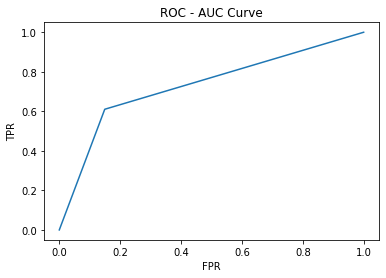

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.title('ROC - AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()